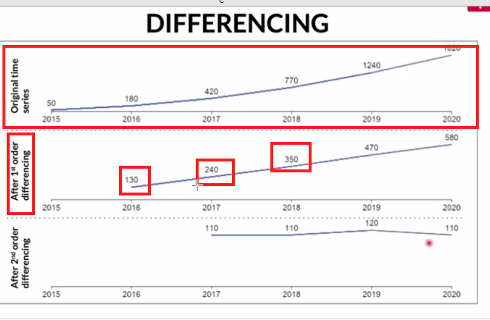

In [1]:
'''
three parameters are required for the ARIMA model
p,d and q
d - level of differencing that converts the original time series into stationary
p is the number of autoregressive terms,
d is the number of nonseasonal differences,
q is the number of lagged forecast errors in the prediction equation
'''

'\nthree parameters are required for the ARIMA model\np,d and q\nd - level of differencing that converts the original time series into stationary\np is the number of autoregressive terms,\nd is the number of nonseasonal differences,\nq is the number of lagged forecast errors in the prediction equation\n'

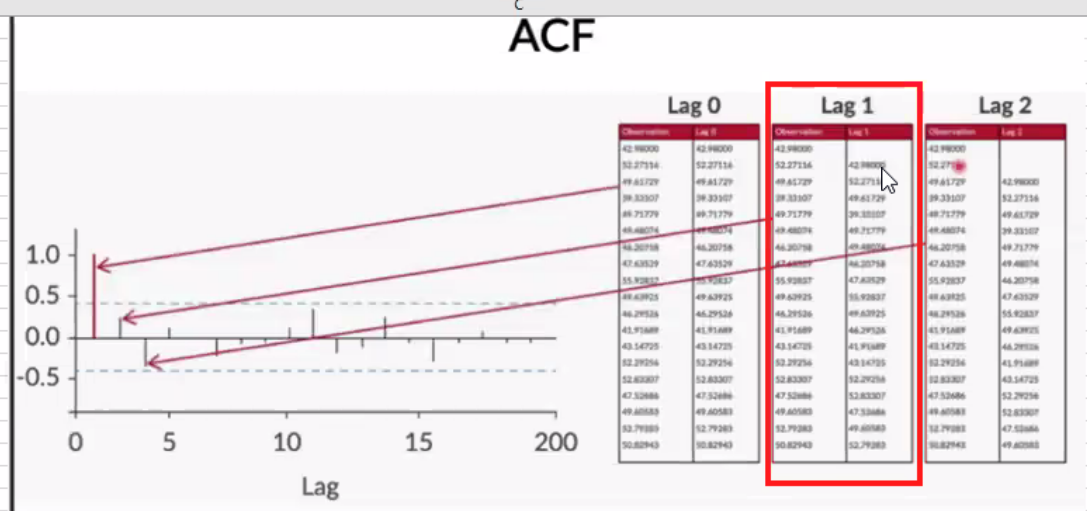

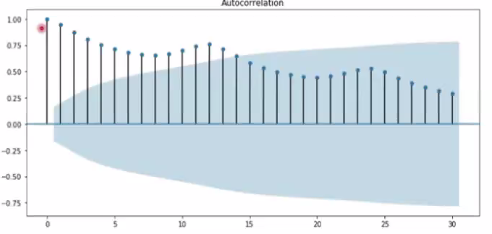
ACF - Auto Correlation Factor
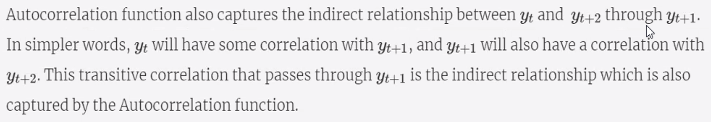
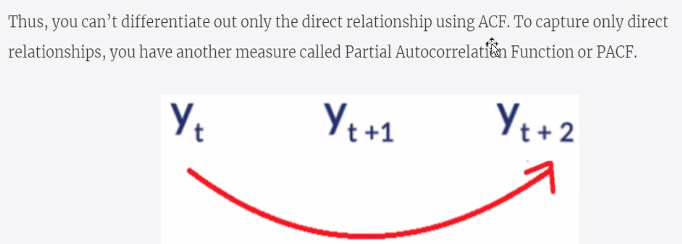

#ARIMA - Auto Regressive Integrated Moving Average
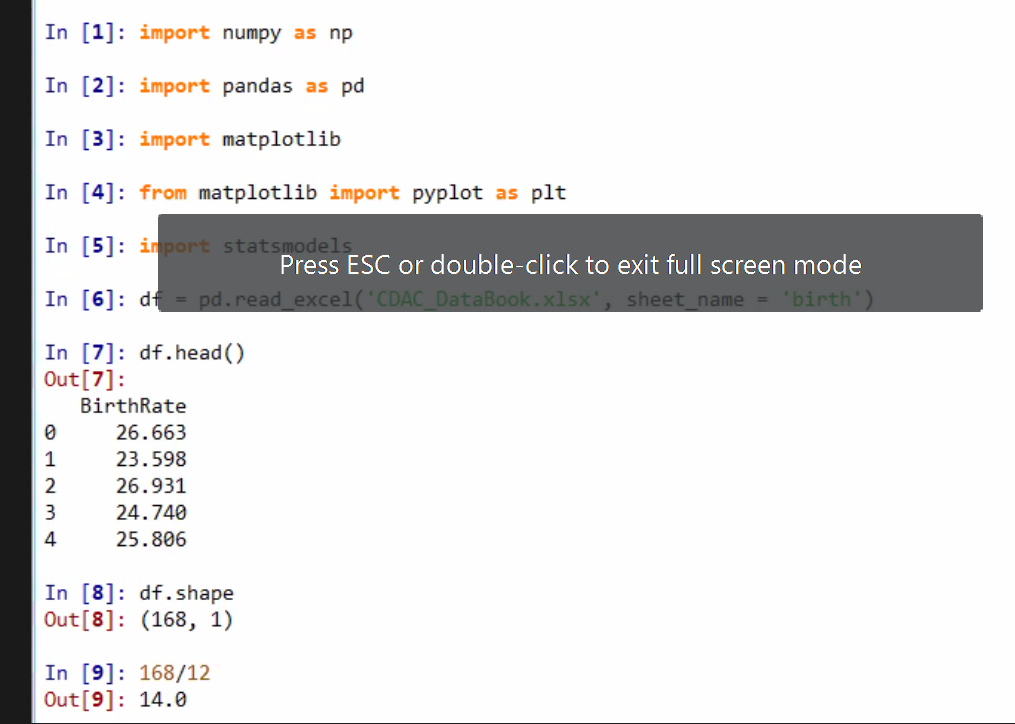

In [3]:
import numpy as np

import pandas as pd

import matplotlib 

from matplotlib import pyplot as plt

import statsmodels


In [14]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='birth')

In [20]:
df.head()

,BirthRate
0,26.663
1,23.598
2,26.931
3,24.740
4,25.806


In [15]:
df.shape

(168, 1)

In [16]:
168/12

14.0

In [17]:
df_train=df.iloc[:135]

In [26]:
df_test=df.iloc[:135]

<AxesSubplot:>

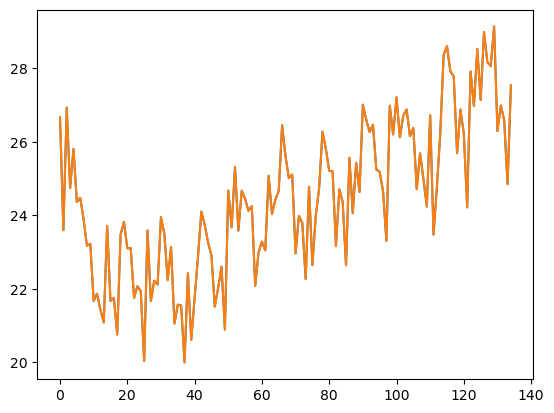

In [28]:
df_train.BirthRate.plot()
df_test.BirthRate.plot() 

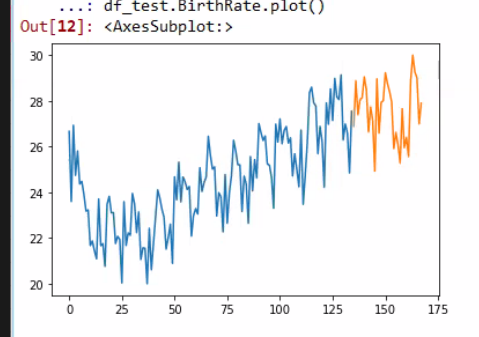

In [29]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df.BirthRate, period = 12)


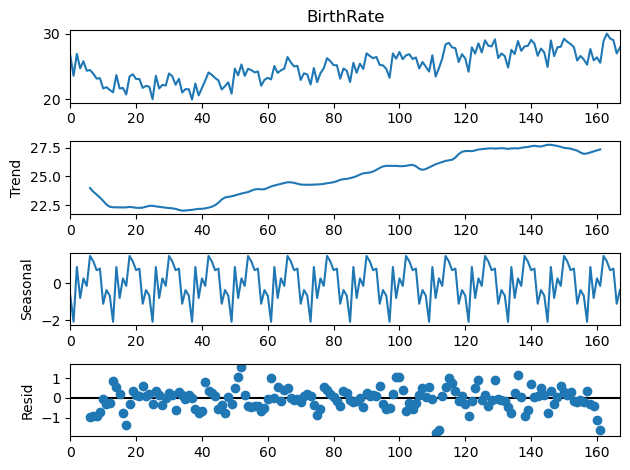

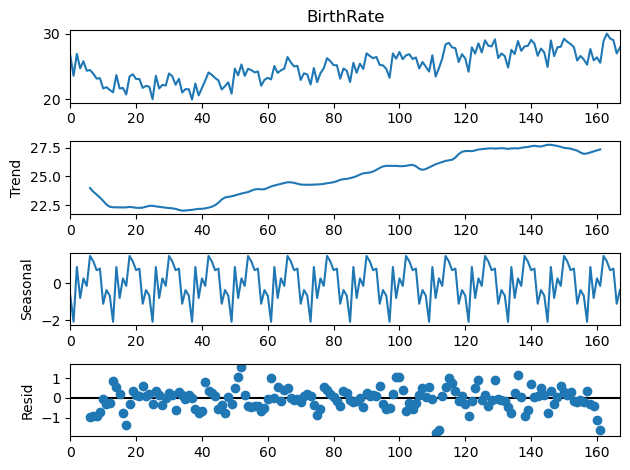

In [30]:
res.plot()


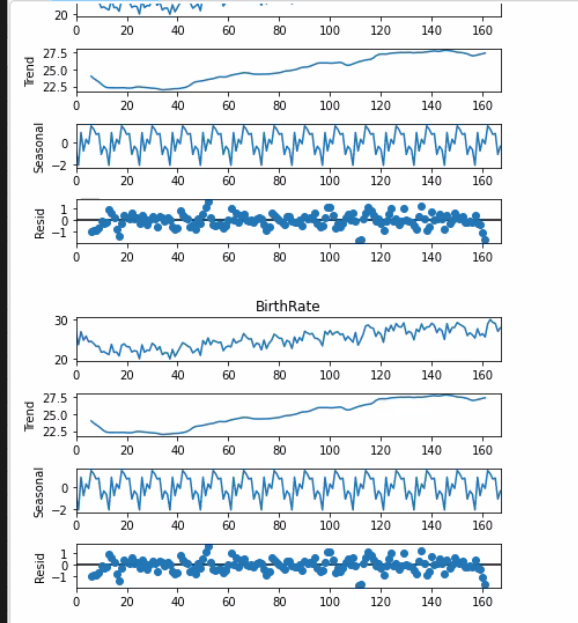
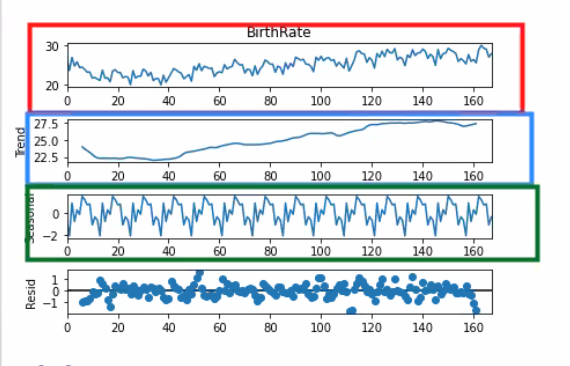

In [31]:
dd= np.asarray(df_train.BirthRate)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1]


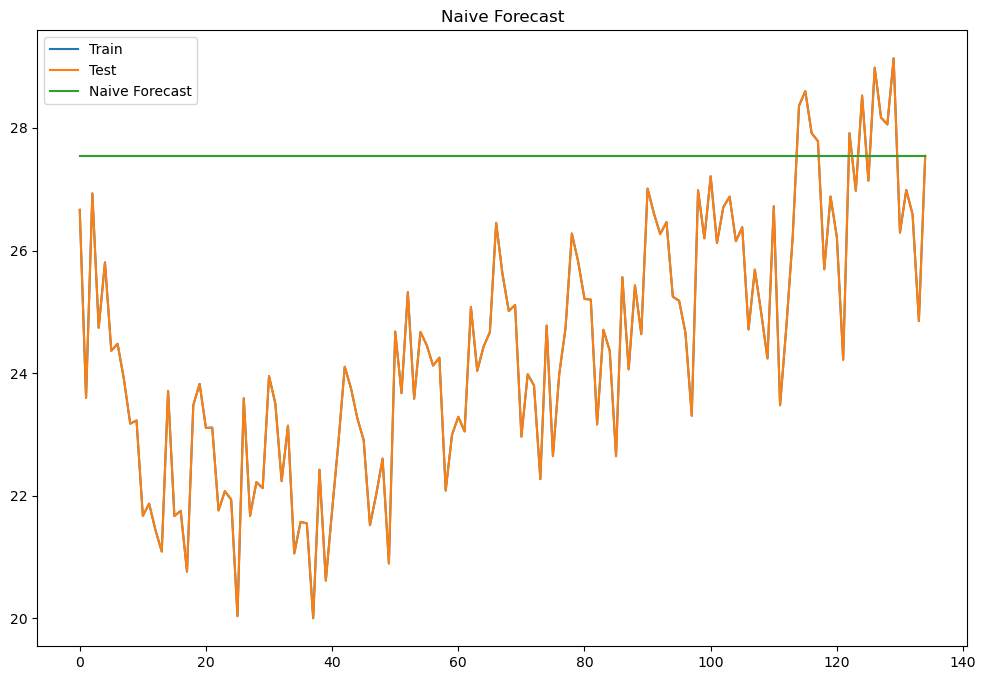

In [32]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index, df_train['BirthRate'], label='Train')
plt.plot(df_test.index,df_test['BirthRate'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error

rms_naive = (mean_squared_error(df_test.BirthRate, y_hat.naive))**0.5


In [34]:
rms_naive

3.731743635750312

In [35]:
y_hat_avg = df_test.copy()
y_hat_avg['avg_forecast'] = df_train['BirthRate'].mean()
